
--- Weekly Mood Insights ---
- You had multiple days of low mood. Consider seeking support.


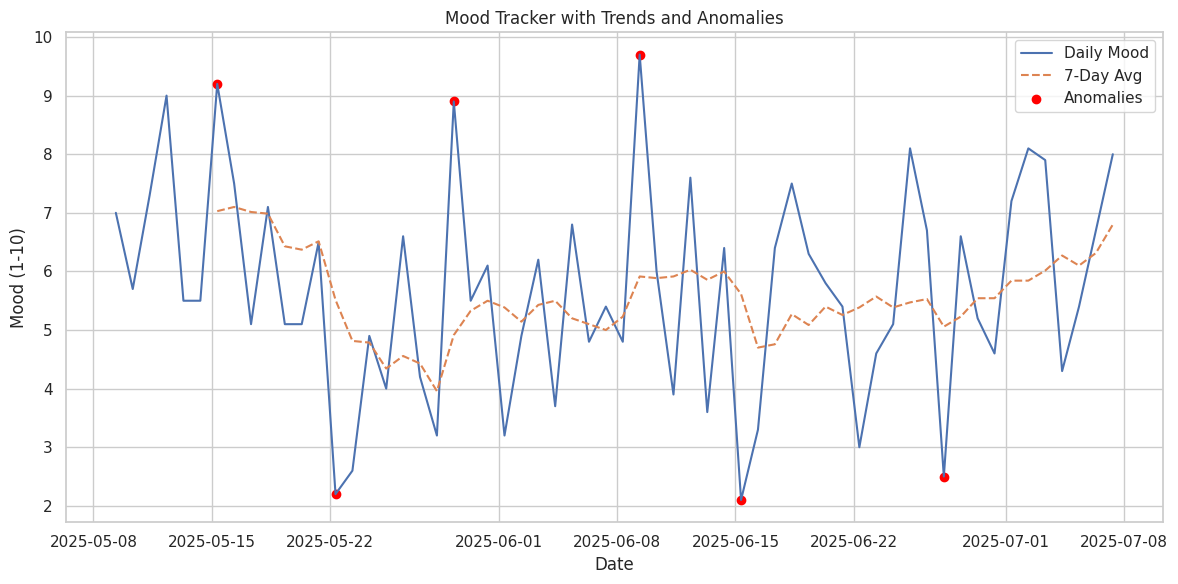

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ Data Simulation ------------------
def generate_sample_data(days=60):
    np.random.seed(42)
    start_date = datetime.now() - timedelta(days=days)
    dates = [start_date + timedelta(days=i) for i in range(days)]
    mood = np.clip(np.random.normal(loc=6, scale=2, size=days), 1, 10).round(1)
    data = pd.DataFrame({'date': dates, 'mood': mood})
    return data

# ------------------ Trend Analysis ------------------
def calculate_trends(data):
    data = data.copy()
    data['7_day_avg'] = data['mood'].rolling(window=7).mean()
    return data

# ------------------ Anomaly Detection ------------------
def detect_anomalies(data):
    model = IsolationForest(contamination=0.1)
    data['mood_scaled'] = (data['mood'] - data['mood'].mean()) / data['mood'].std()
    data['anomaly'] = model.fit_predict(data[['mood_scaled']])
    return data

# ------------------ Insight Generation ------------------
def generate_insights(data):
    insights = []
    low_mood_days = data[data['mood'] <= 3]
    if len(low_mood_days) >= 3:
        insights.append("You had multiple days of low mood. Consider seeking support.")

    if data['mood'].iloc[-1] < data['7_day_avg'].iloc[-1] - 1:
        insights.append("Recent mood is dropping below your weekly average.")

    if not insights:
        insights.append("Mood trend is stable. Keep up your healthy habits!")
    return insights

# ------------------ Visualization ------------------
def plot_mood(data):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    plt.plot(data['date'], data['mood'], label='Daily Mood')
    plt.plot(data['date'], data['7_day_avg'], label='7-Day Avg', linestyle='--')
    plt.scatter(data[data['anomaly']==-1]['date'], data[data['anomaly']==-1]['mood'], color='red', label='Anomalies')
    plt.title("Mood Tracker with Trends and Anomalies")
    plt.xlabel("Date")
    plt.ylabel("Mood (1-10)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ------------------ Main Pipeline ------------------
def main():
    data = generate_sample_data()
    data = calculate_trends(data)
    data = detect_anomalies(data)
    insights = generate_insights(data)

    print("\n--- Weekly Mood Insights ---")
    for insight in insights:
        print(f"- {insight}")

    plot_mood(data)

if __name__ == '__main__':
    main()